In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
bm_path = 'bm/base_bm.yaml'
original_path = 'original/base_modified_pt.yaml'

In [3]:
def plot_rates(T, original_file, bm_file):
    """
    T: temperature in K
    original_file: the file directory for the original yaml file
    bm_file: the file directory for the bm yaml file
    """
    original_gas = ct.Solution(original_path, 'gas')
    original_surf = ct.Interface(original_path, 'surface1', [original_gas])
    bm_gas = ct.Solution(bm_path, 'gas')
    bm_surf = ct.Interface(bm_path, 'surface1', [bm_gas])
    original_surf.TP = T, ct.one_atm
    bm_surf.TP = T, ct.one_atm
    width = 0.2
    fig = plt.figure(figsize=(36, 6), dpi=80)
    ax = fig.add_subplot(111)
    original_data = ax.bar(np.arange(original_surf.n_reactions), np.log10(original_surf.forward_rate_constants), width)
    bm_data = ax.bar(np.arange(bm_surf.n_reactions)+width, np.log10(bm_surf.forward_rate_constants), width)
    ax.set_xticks(np.arange(bm_surf.n_reactions)+width)
    ax.set_xticklabels(np.arange(bm_surf.n_reactions))
    ax.legend((original_data[0], bm_data[0]), ('rate of constants original model', 'rate constants of bm model'))

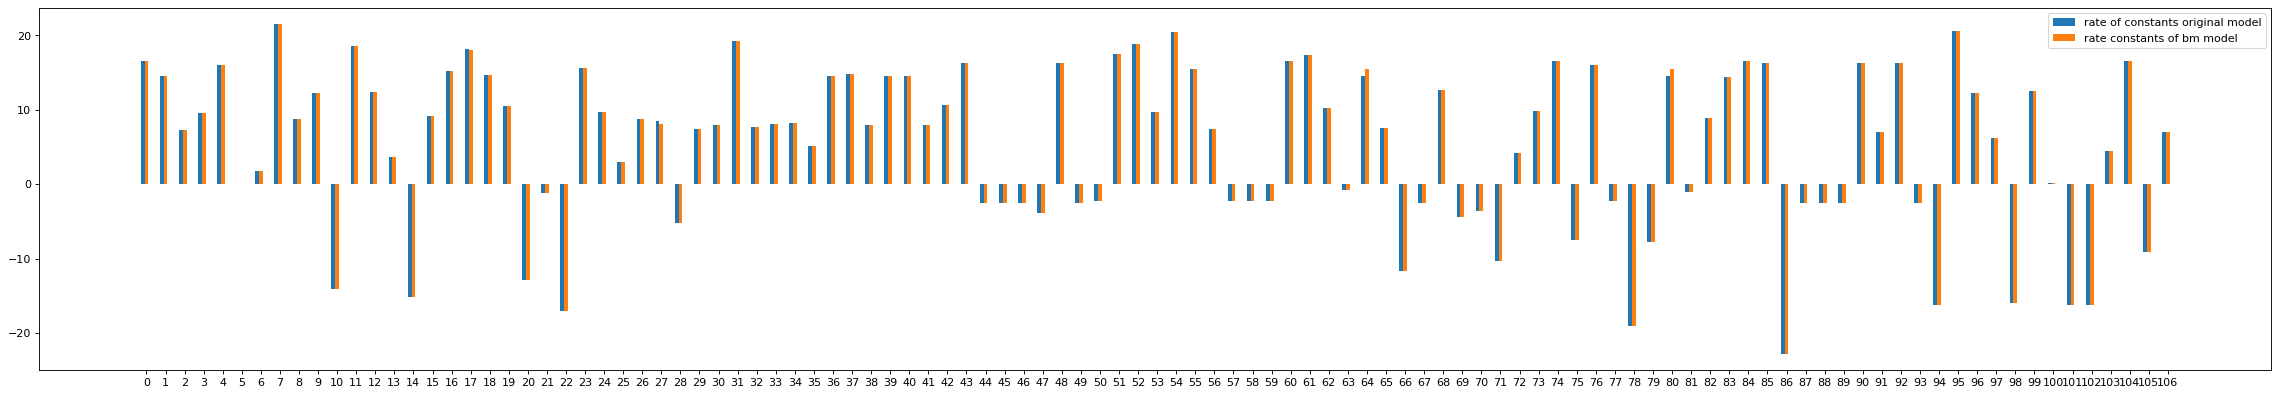

In [4]:
plot_rates(300, original_path, bm_path)

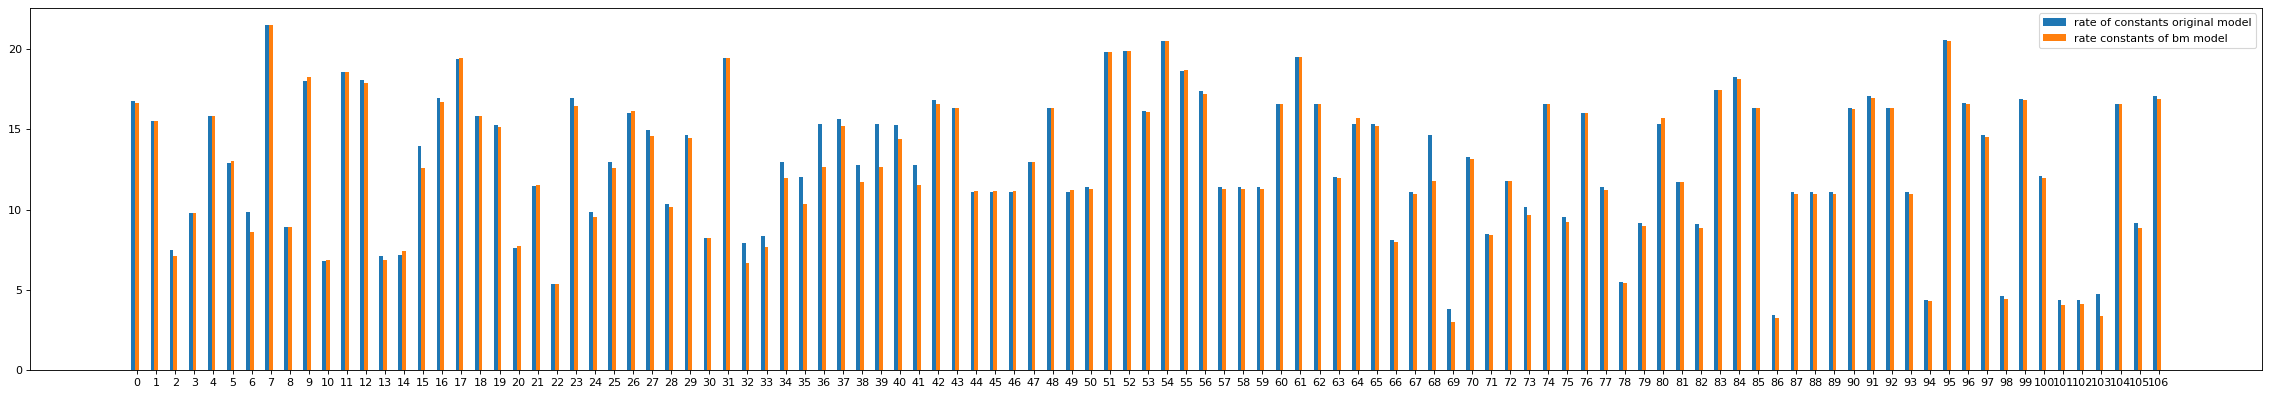

In [5]:
plot_rates(800, original_path, bm_path)

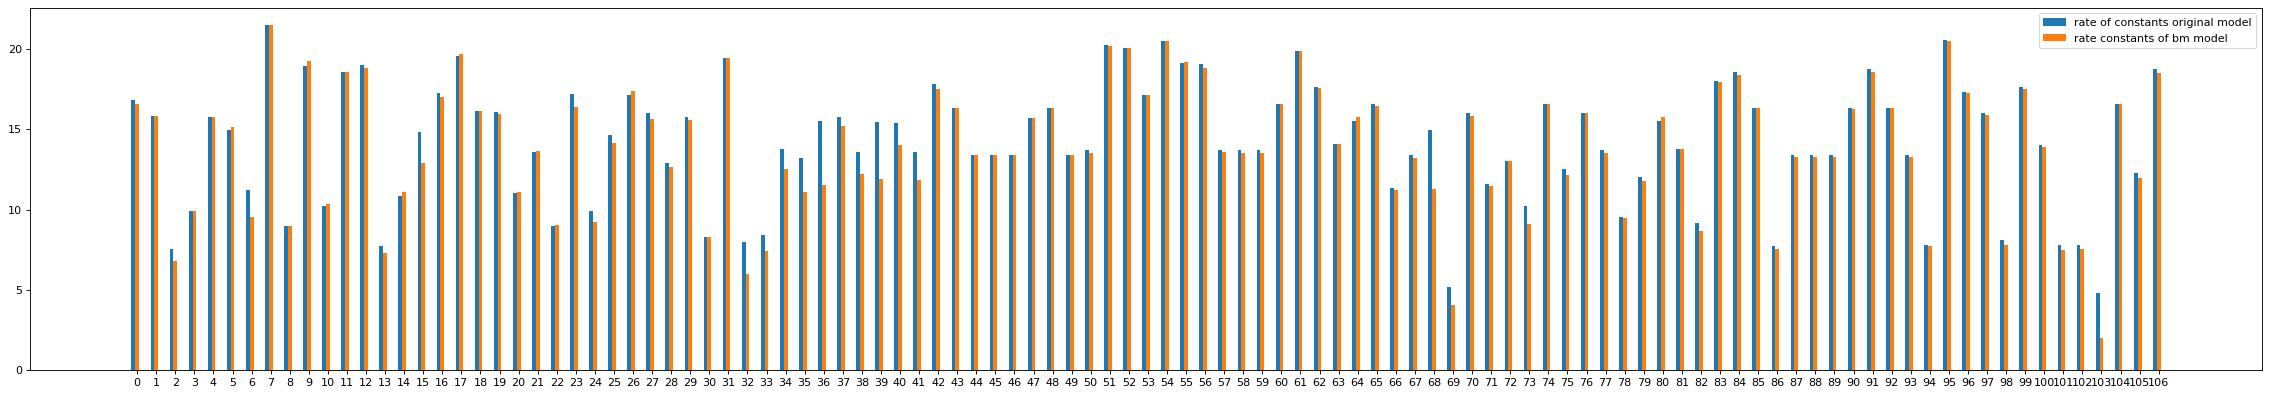

In [4]:
plot_rates(1100, original_path, bm_path)

In [10]:
bm_gas = ct.Solution(bm_path, 'gas')
bm_surf = ct.Interface(bm_path, 'surface1', [bm_gas])
original_gas = ct.Solution(original_path, 'gas')
original_surf = ct.Interface(original_path, 'surface1', [original_gas])
original_surf.TP = 1900, ct.one_atm
bm_surf.TP = 1900, ct.one_atm

In [12]:
original_surf.forward_rate_constants[103]

81518.94776789207

In [13]:
bm_surf.forward_rate_constants[103]

0.7344748049578272

In [15]:
bm_surf.reactions()[103]

C2H6(8) + X(1) <=> C2H6X(65)    <Reaction(sticking-Blowers-Masel)>